# Estadística con Python

### GitHub repository: https://github.com/jorgemauricio/python_statistics

### Instructor: Jorge Mauricio

# Regresión Lineal

** Eres un agente de bienes raices el cual desea tomar partido de sus conocimientos en Data Science, para predecir el precio de algunas propiedades a lo largo de USA**

La información que vamos a tomar como referencia contiene los siguientes campos:

* 'sueldo': Sueldo promedio de las personas que viven en la ciudad donde se encuentra la casa.
* 'antiguedad': Promedio de antiguedad de las casas en la misma ciudad
* 'cuartos': Promedio de cuartos por casa
* 'recamaras': Promedio de recamaras por casa 
* 'poblacion': Población en donde se encuentra la casa
* 'precio': Precio de la casa
* 'direccion': Direccion de la casa

In [41]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

In [42]:
# leer el csv
df = pd.read_csv('data/db_usa_info_house.csv')

In [43]:
# estructura del df
df.head()

,sueldo,antiguedad,cuartos,recamaras,poblacion,precio,direccion
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [44]:
# información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
sueldo        5000 non-null float64
antiguedad    5000 non-null float64
cuartos       5000 non-null float64
recamaras     5000 non-null float64
poblacion     5000 non-null float64
precio        5000 non-null float64
direccion     5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [45]:
# descripción del df
df.describe()

,sueldo,antiguedad,cuartos,recamaras,poblacion,precio
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [46]:
# columnas
df.columns

Index(['sueldo', 'antiguedad', 'cuartos', 'recamaras', 'poblacion', 'precio',
       'direccion'],
      dtype='object')

# EDA (Explore Data Analysis)

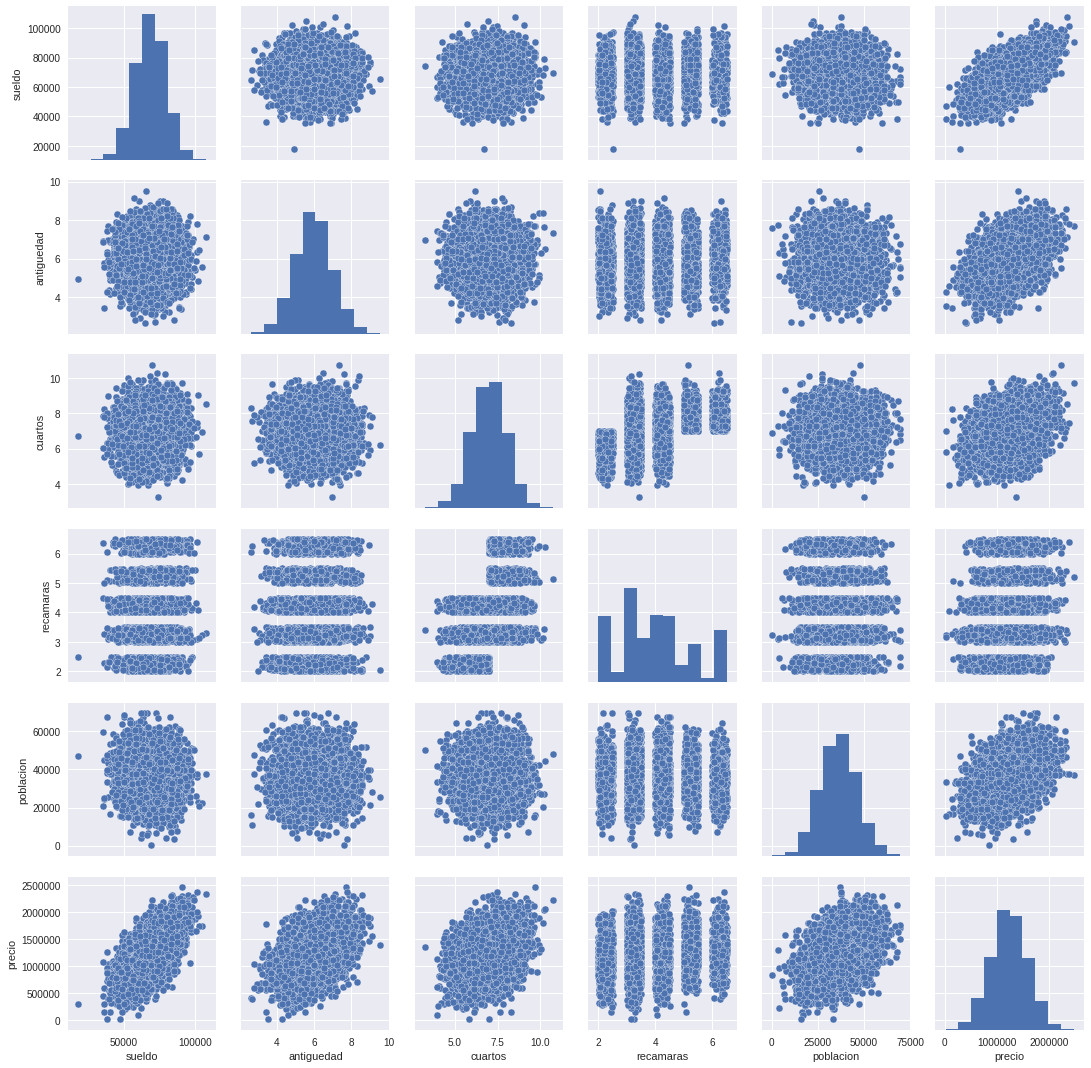

In [47]:
# gráfica de relacion entre variables
sns.pairplot(df)

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


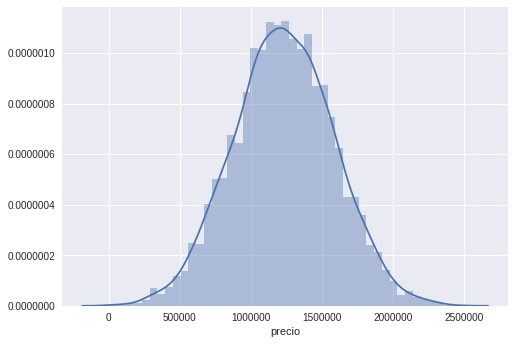

In [48]:
# distribución del precio
sns.distplot(df['precio'])

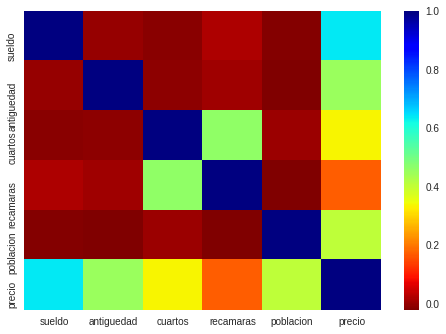

In [49]:
# mapa de calor de la correlación de las variables
sns.heatmap(df.corr(), cmap="jet_r")

## Entrenar nuestro modelo de regresión lineal

Recuerda dividir la información en variables independientes y nuestra variable independiente en este caso la columna que contiene el precio de la casa

In [50]:
# Variables independientes
X = df[['sueldo', 'antiguedad', 'cuartos','recamaras', 'poblacion']]

# Variable independiente
y = df['precio']

## Dividir la información en Train y Test

In [51]:
# librería sklearn
from sklearn.model_selection import train_test_split

In [52]:
# dividir la información
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Crear el modelo de entrenamiento

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluar el modelo

In [56]:
# print the intercept
print(model.intercept_)

-2640159.796851911


In [57]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['coeficiente'])
coeff_df

,coeficiente
sueldo,21.528276
antiguedad,164883.282027
cuartos,122368.678027
recamaras,2233.801864
poblacion,15.150420


El incremento en una unidad de:

* sueldo generar un aumento de: **21.52 en precio**
* antiguedad generar un aumento de: **164883.28 en precio**
* cuartos generar un aumento de: **122368.67 en precio**
* recamaras generar un aumento de: **2233.80 en precio**
* poblacion generar un aumento de: **12.15 en precio**

## Predicciones de nuestro modelo

In [58]:
# predicciones
predictions = model.predict(X_test)

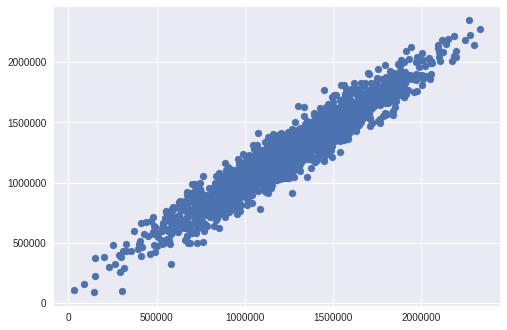

In [59]:
# gráfica de puntos
plt.scatter(y_test,predictions)

### Histograma de residuales

/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


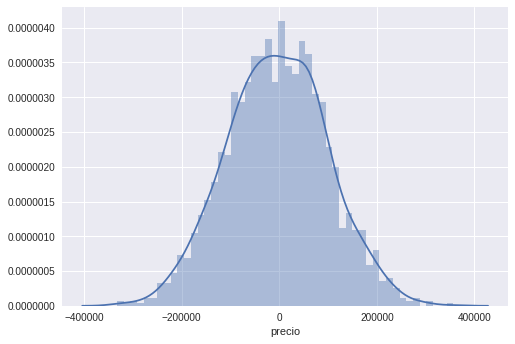

In [60]:
sns.distplot((y_test-predictions),bins=50);

## Evaluación de la regresión 

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


### Valor de R2

In [63]:
# librería regresión lineal
from scipy import stats

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)

In [65]:
# valor de R2
r_value ** 2

0.9178201607417024